In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


# **Understanding data**

In [215]:
data=pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [216]:
data.shape

(6607, 20)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [218]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [219]:
data.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [220]:
data.columns[data.isnull().any()].to_list()

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

In [221]:
numerical_col=[col for col in data.columns if data[col].dtype!='object']
categorical_col=[col for col in data.columns if data[col].dtype=='object']
categorical_col

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

# **Data visualization**

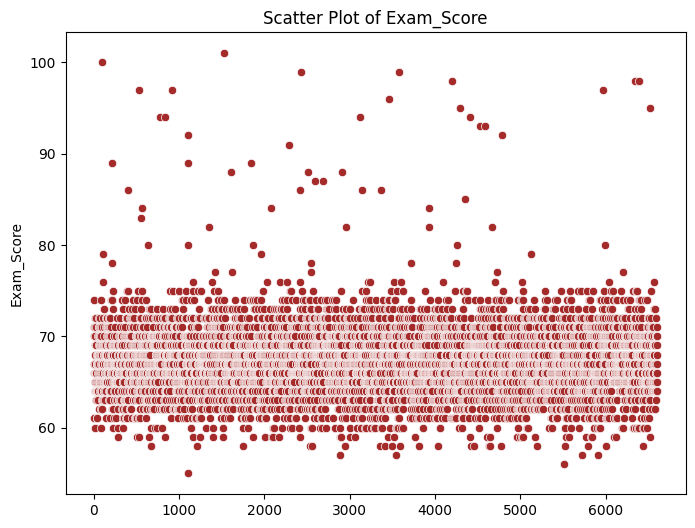

In [209]:
sns.scatterplot( data=data['Exam_Score'],color='brown')
plt.ylabel('Exam_Score')
plt.title('Scatter Plot of Exam_Score')
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

<ipython-input-210-beb6602783de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Exam_Score'], color='r', bins=100, hist_kws={'alpha': 0.4});


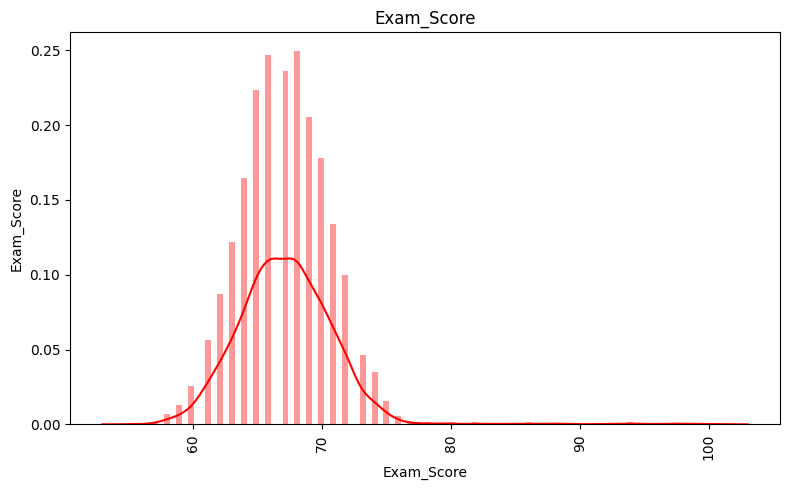

In [210]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Exam_Score'], color='r', bins=100, hist_kws={'alpha': 0.4});
plt.title('Exam_Score')
plt.xticks(rotation=90)
plt.xlabel('Exam_Score')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

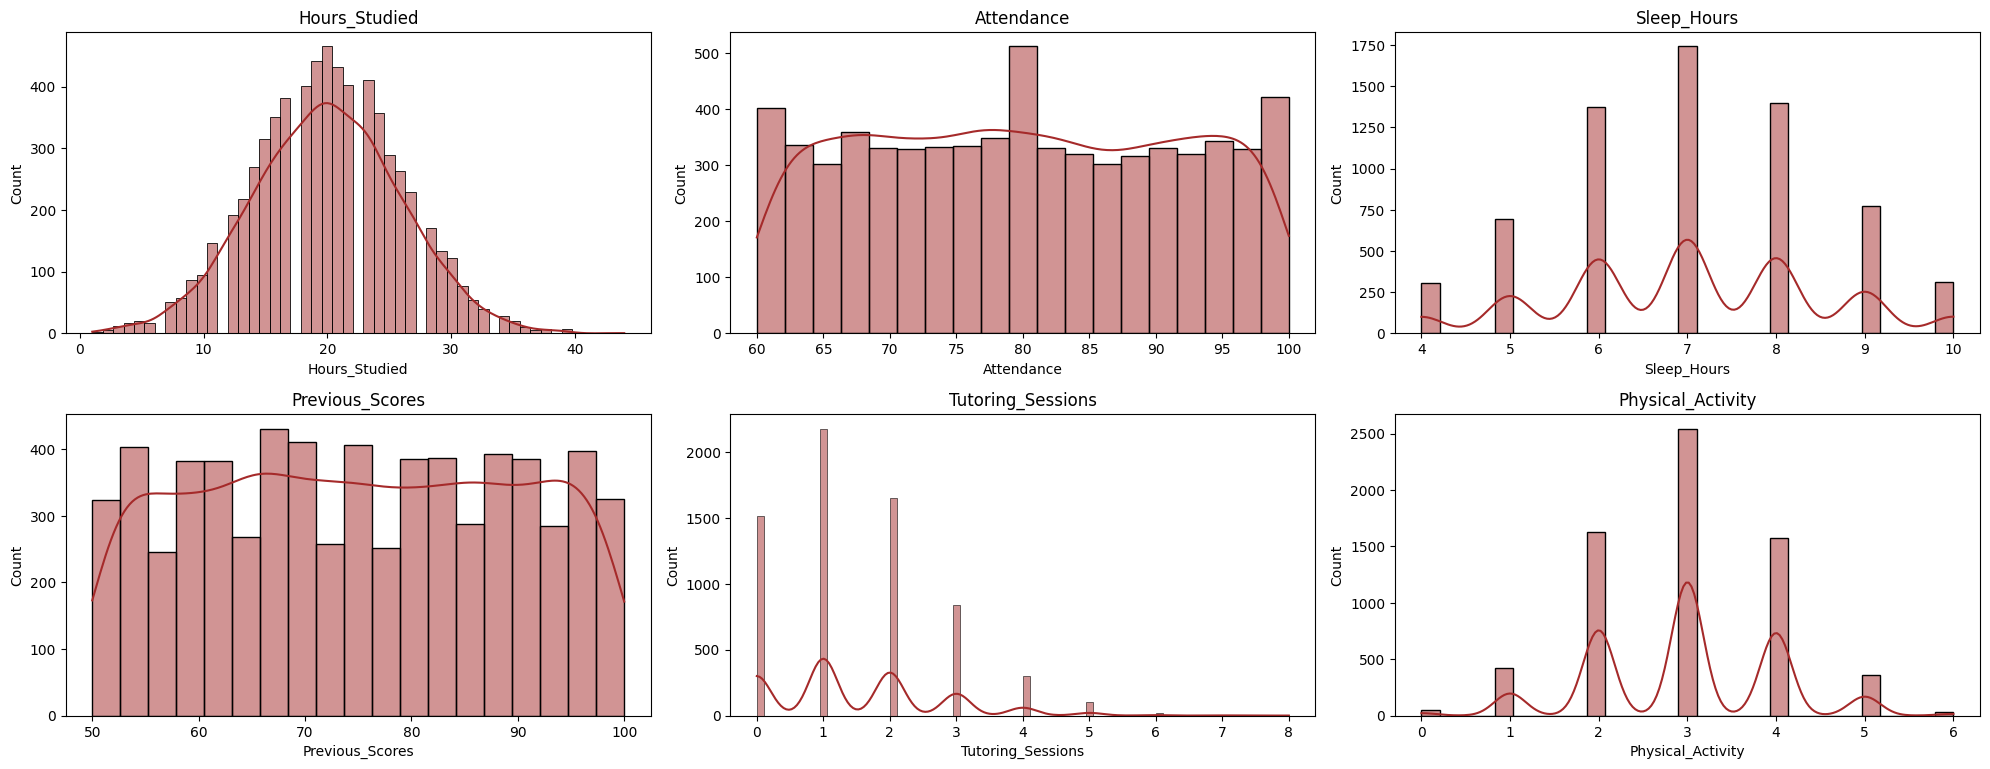

In [211]:
#hist plot for numerical data
plt.figure(figsize=(20,15))
for i in range(len(numerical_col)-1):
    plt.subplot(4,3,i+1)
    sns.histplot(data[numerical_col[i]],kde=True,color='brown')
    plt.title(numerical_col[i])
plt.tight_layout()
plt.show()

<ipython-input-212-45688fae161d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[numerical_col[i]],palette='Set3')
<ipython-input-212-45688fae161d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[numerical_col[i]],palette='Set3')
<ipython-input-212-45688fae161d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[numerical_col[i]],palette='Set3')
<ipython-input-212-45688fae161d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

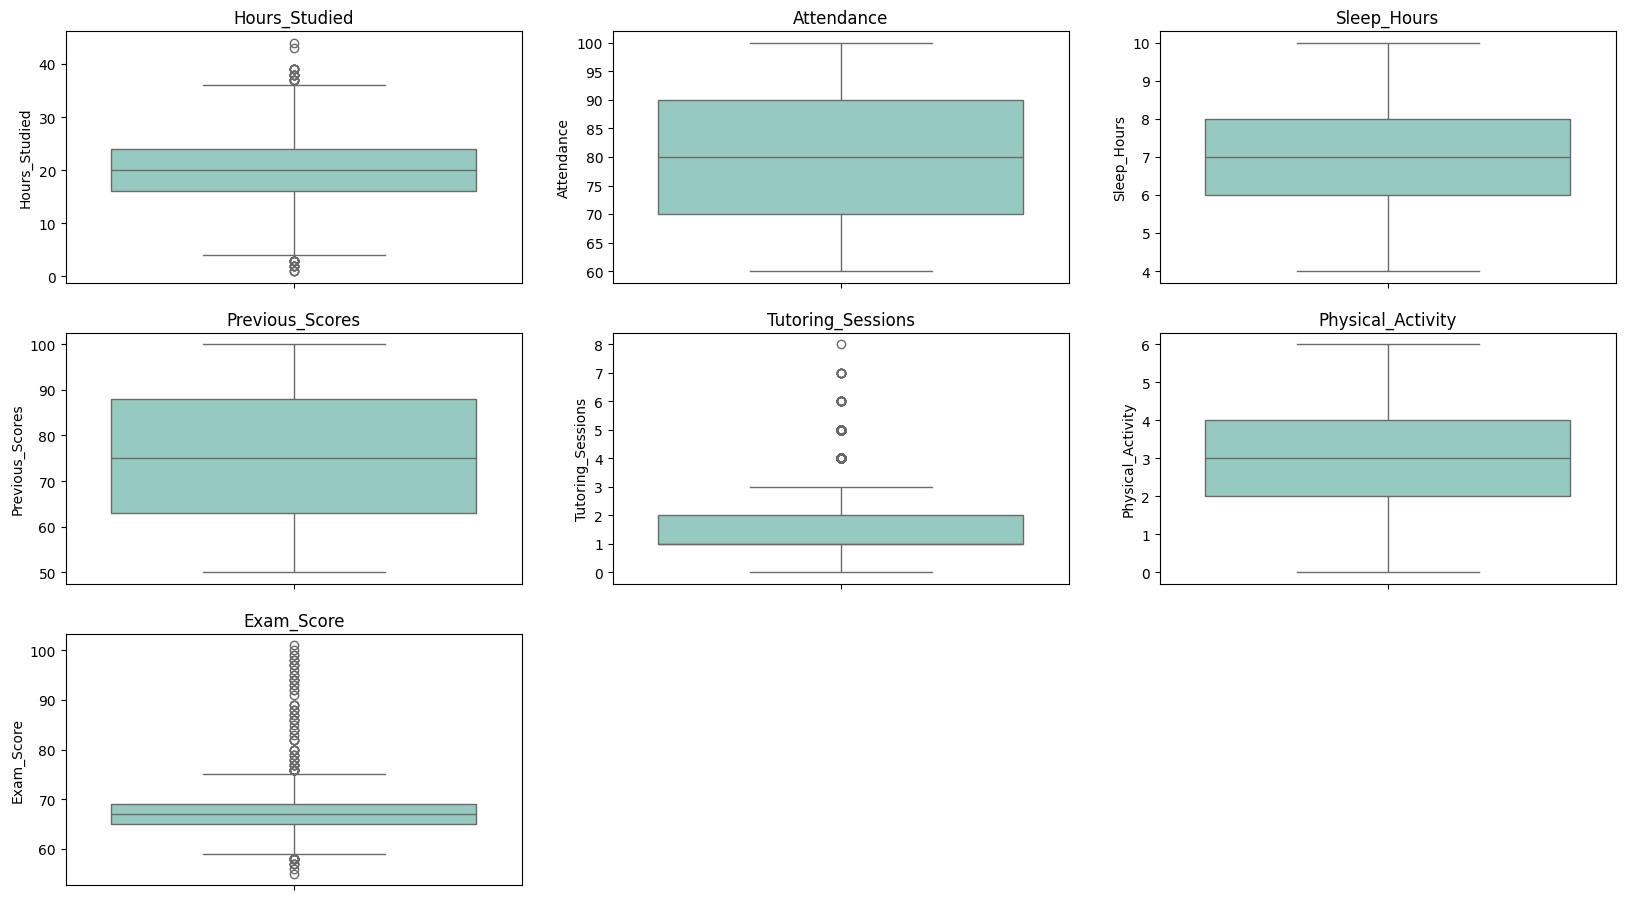

In [212]:
plt.figure(figsize=(20,15))
for i in range(len(numerical_col)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=data[numerical_col[i]],palette='Set3')
    plt.title(numerical_col[i])
# plt.tight_layout()
plt.show()

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


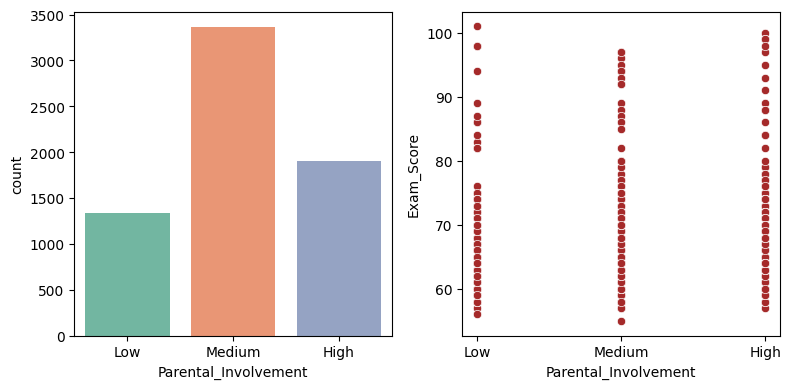

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


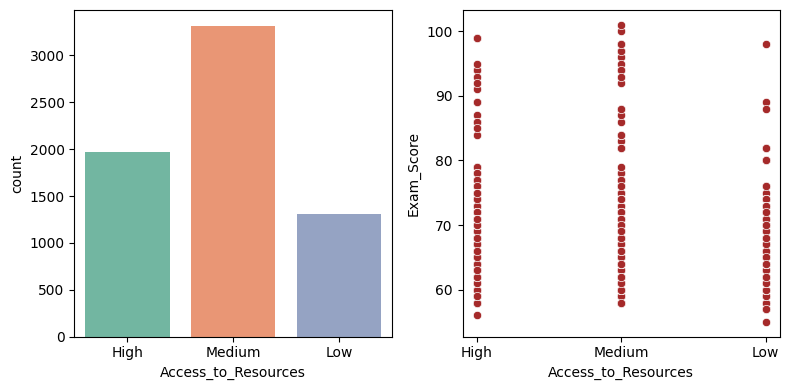

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


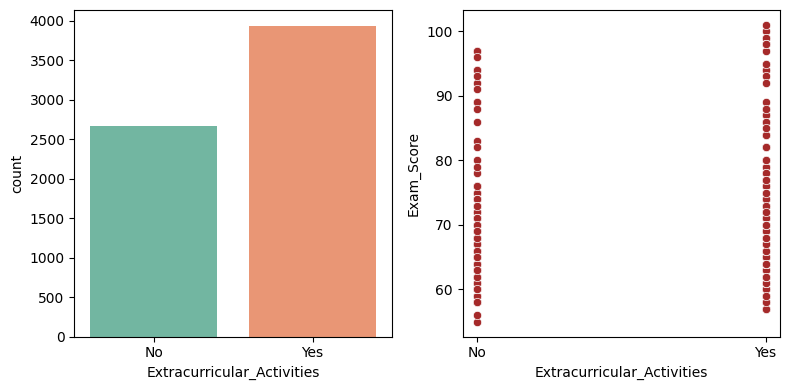

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


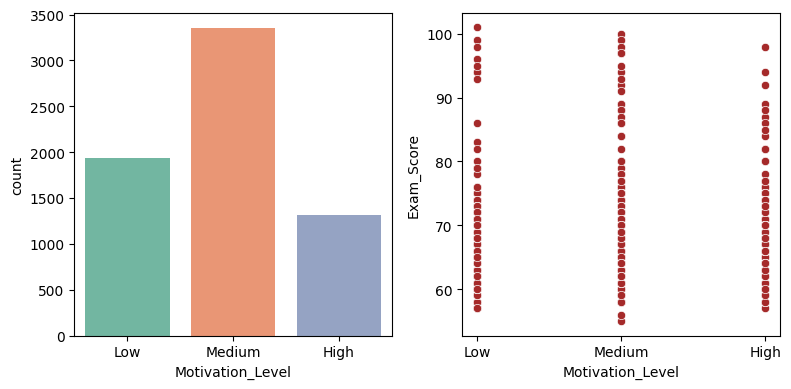

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


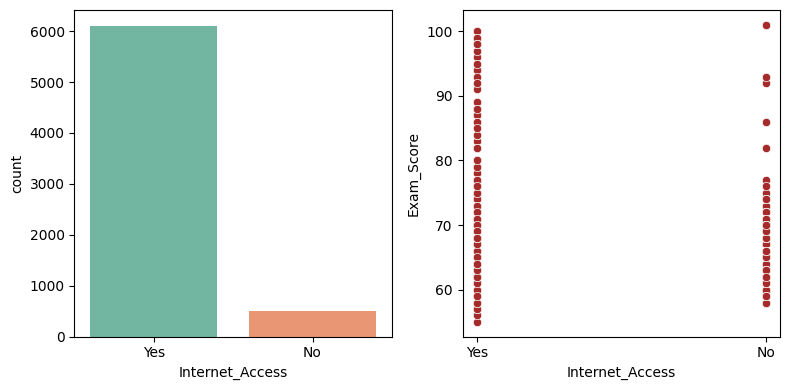

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


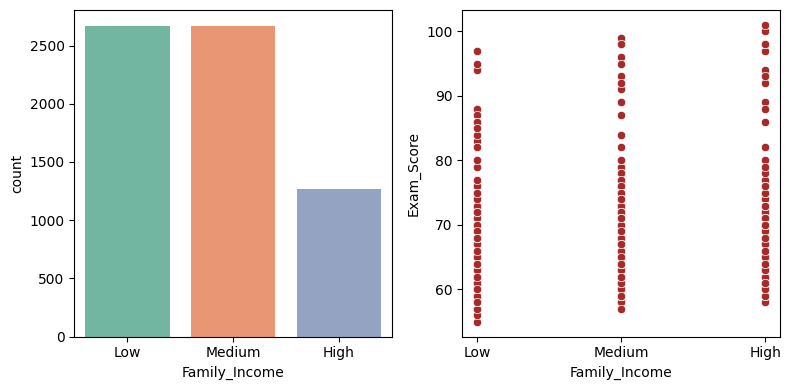

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


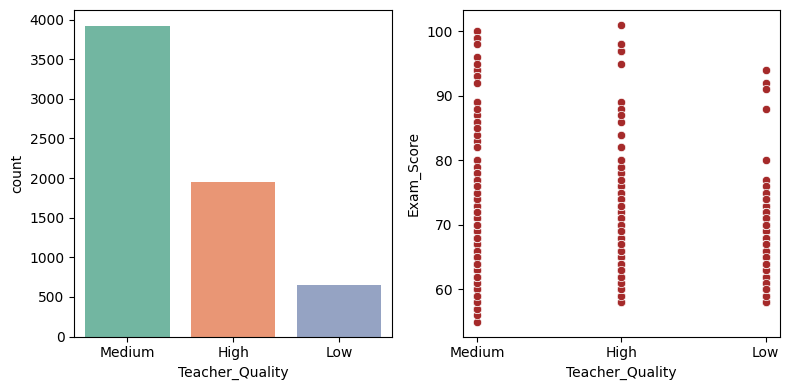

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


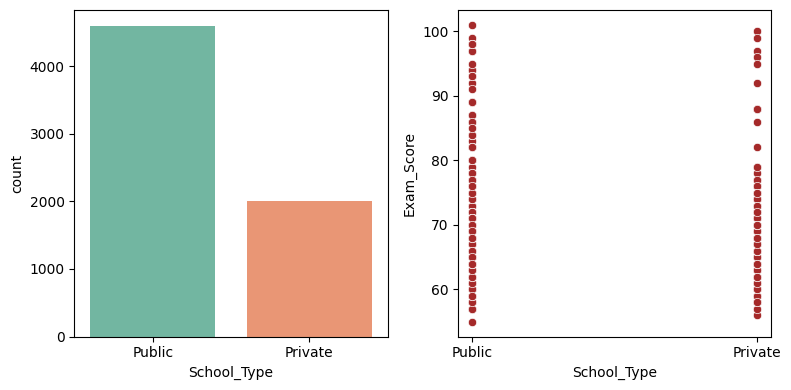

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


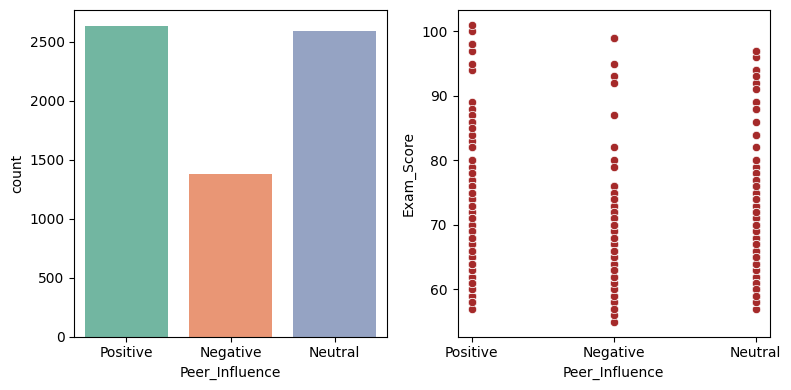

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


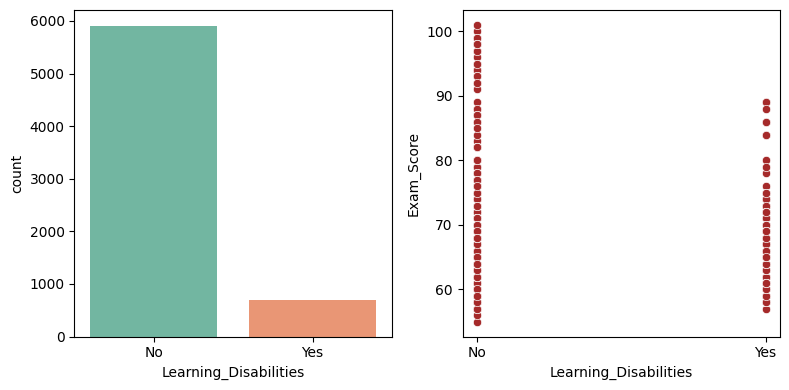

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


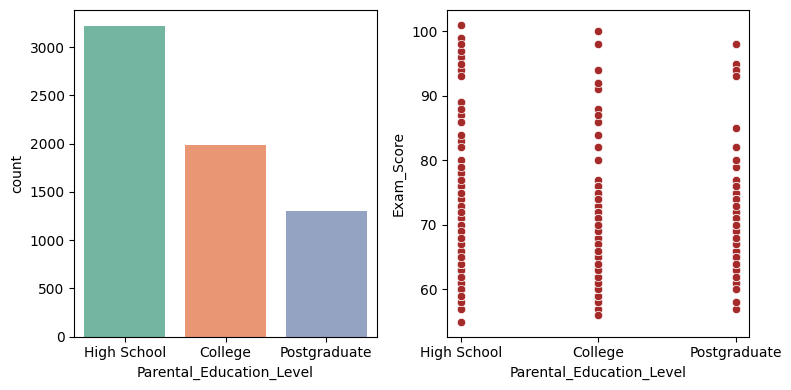

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


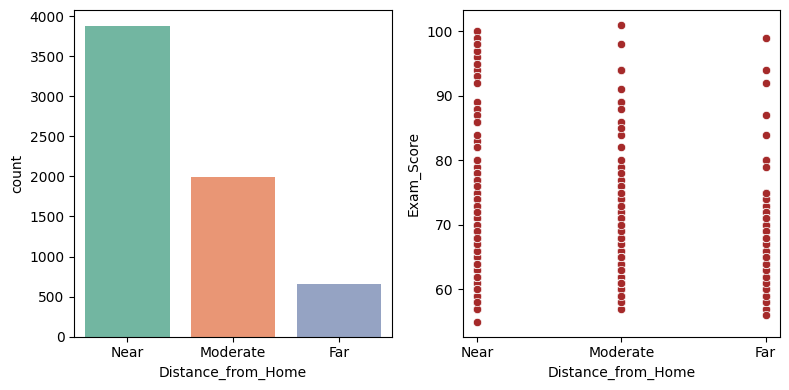

<ipython-input-222-a39220e0c53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[categorical_col[i]],palette='Set2')


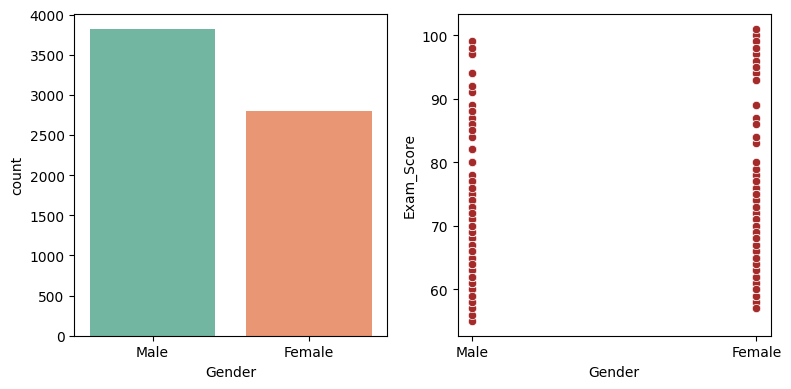

In [222]:
for i in range(len(categorical_col)):
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[categorical_col[i]],palette='Set2')
    plt.tight_layout()
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data[categorical_col[i]], y=data['Exam_Score'], color='brown')  # If SalePrice or a target variable exists
    plt.tight_layout()
    plt.show()

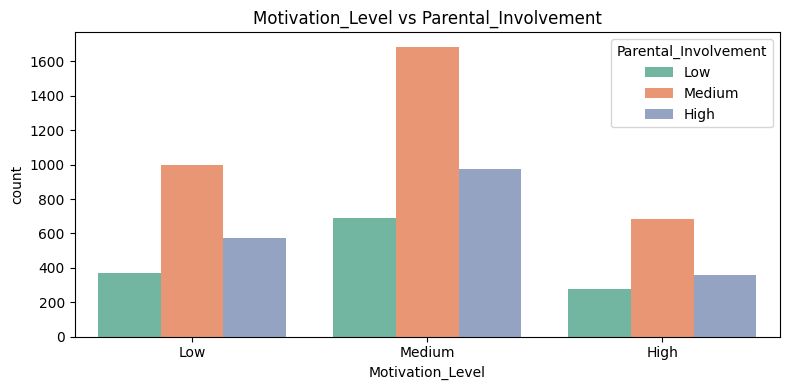

In [251]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['Motivation_Level'],hue=data['Parental_Involvement'],palette='Set2')
plt.title('Motivation_Level vs Parental_Involvement')
plt.tight_layout()

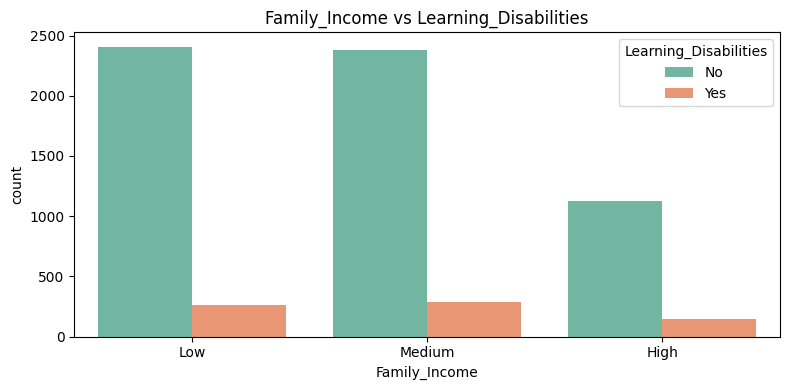

In [250]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['Family_Income'],hue=data['Learning_Disabilities'],palette='Set2')
plt.title('Family_Income vs Learning_Disabilities')
plt.tight_layout()

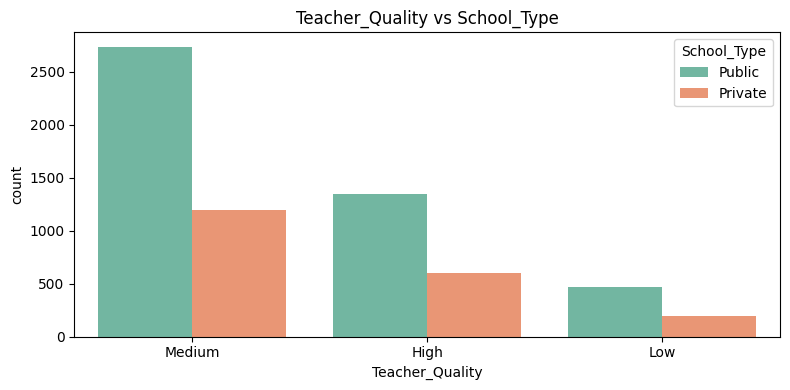

In [249]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['Teacher_Quality'],hue=data['School_Type'],palette='Set2')
plt.title('Teacher_Quality vs School_Type')
plt.tight_layout()

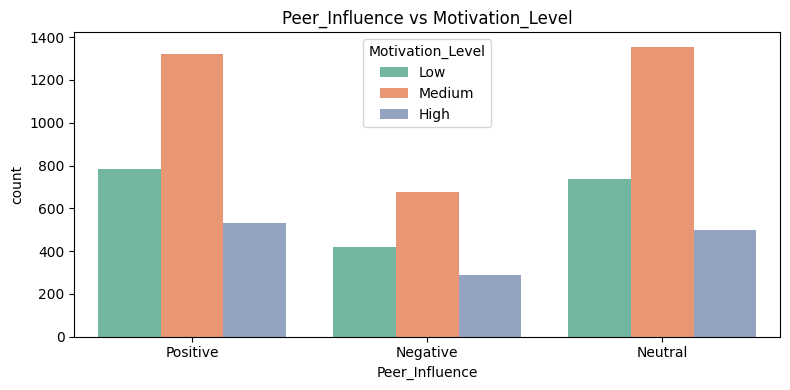

In [247]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['Peer_Influence'],hue=data['Motivation_Level'],palette='Set2')
plt.title('Peer_Influence vs Motivation_Level')
plt.tight_layout()

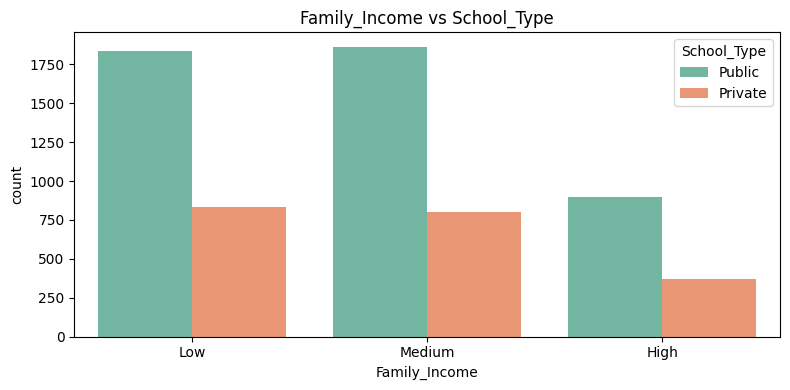

In [248]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['Family_Income'],hue=data['School_Type'],palette='Set2')
plt.title('Family_Income vs School_Type')
plt.tight_layout()

<ipython-input-225-694675d00c16>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Exam_Score'], hue=data[categorical_col[i]], shade=True, bw_adjust=.5)
<ipython-input-225-694675d00c16>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Exam_Score'], hue=data[categorical_col[i]], shade=True, bw_adjust=.5)
<ipython-input-225-694675d00c16>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Exam_Score'], hue=data[categorical_col[i]], shade=True, bw_adjust=.5)
<ipython-input-225-694675d00c16>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

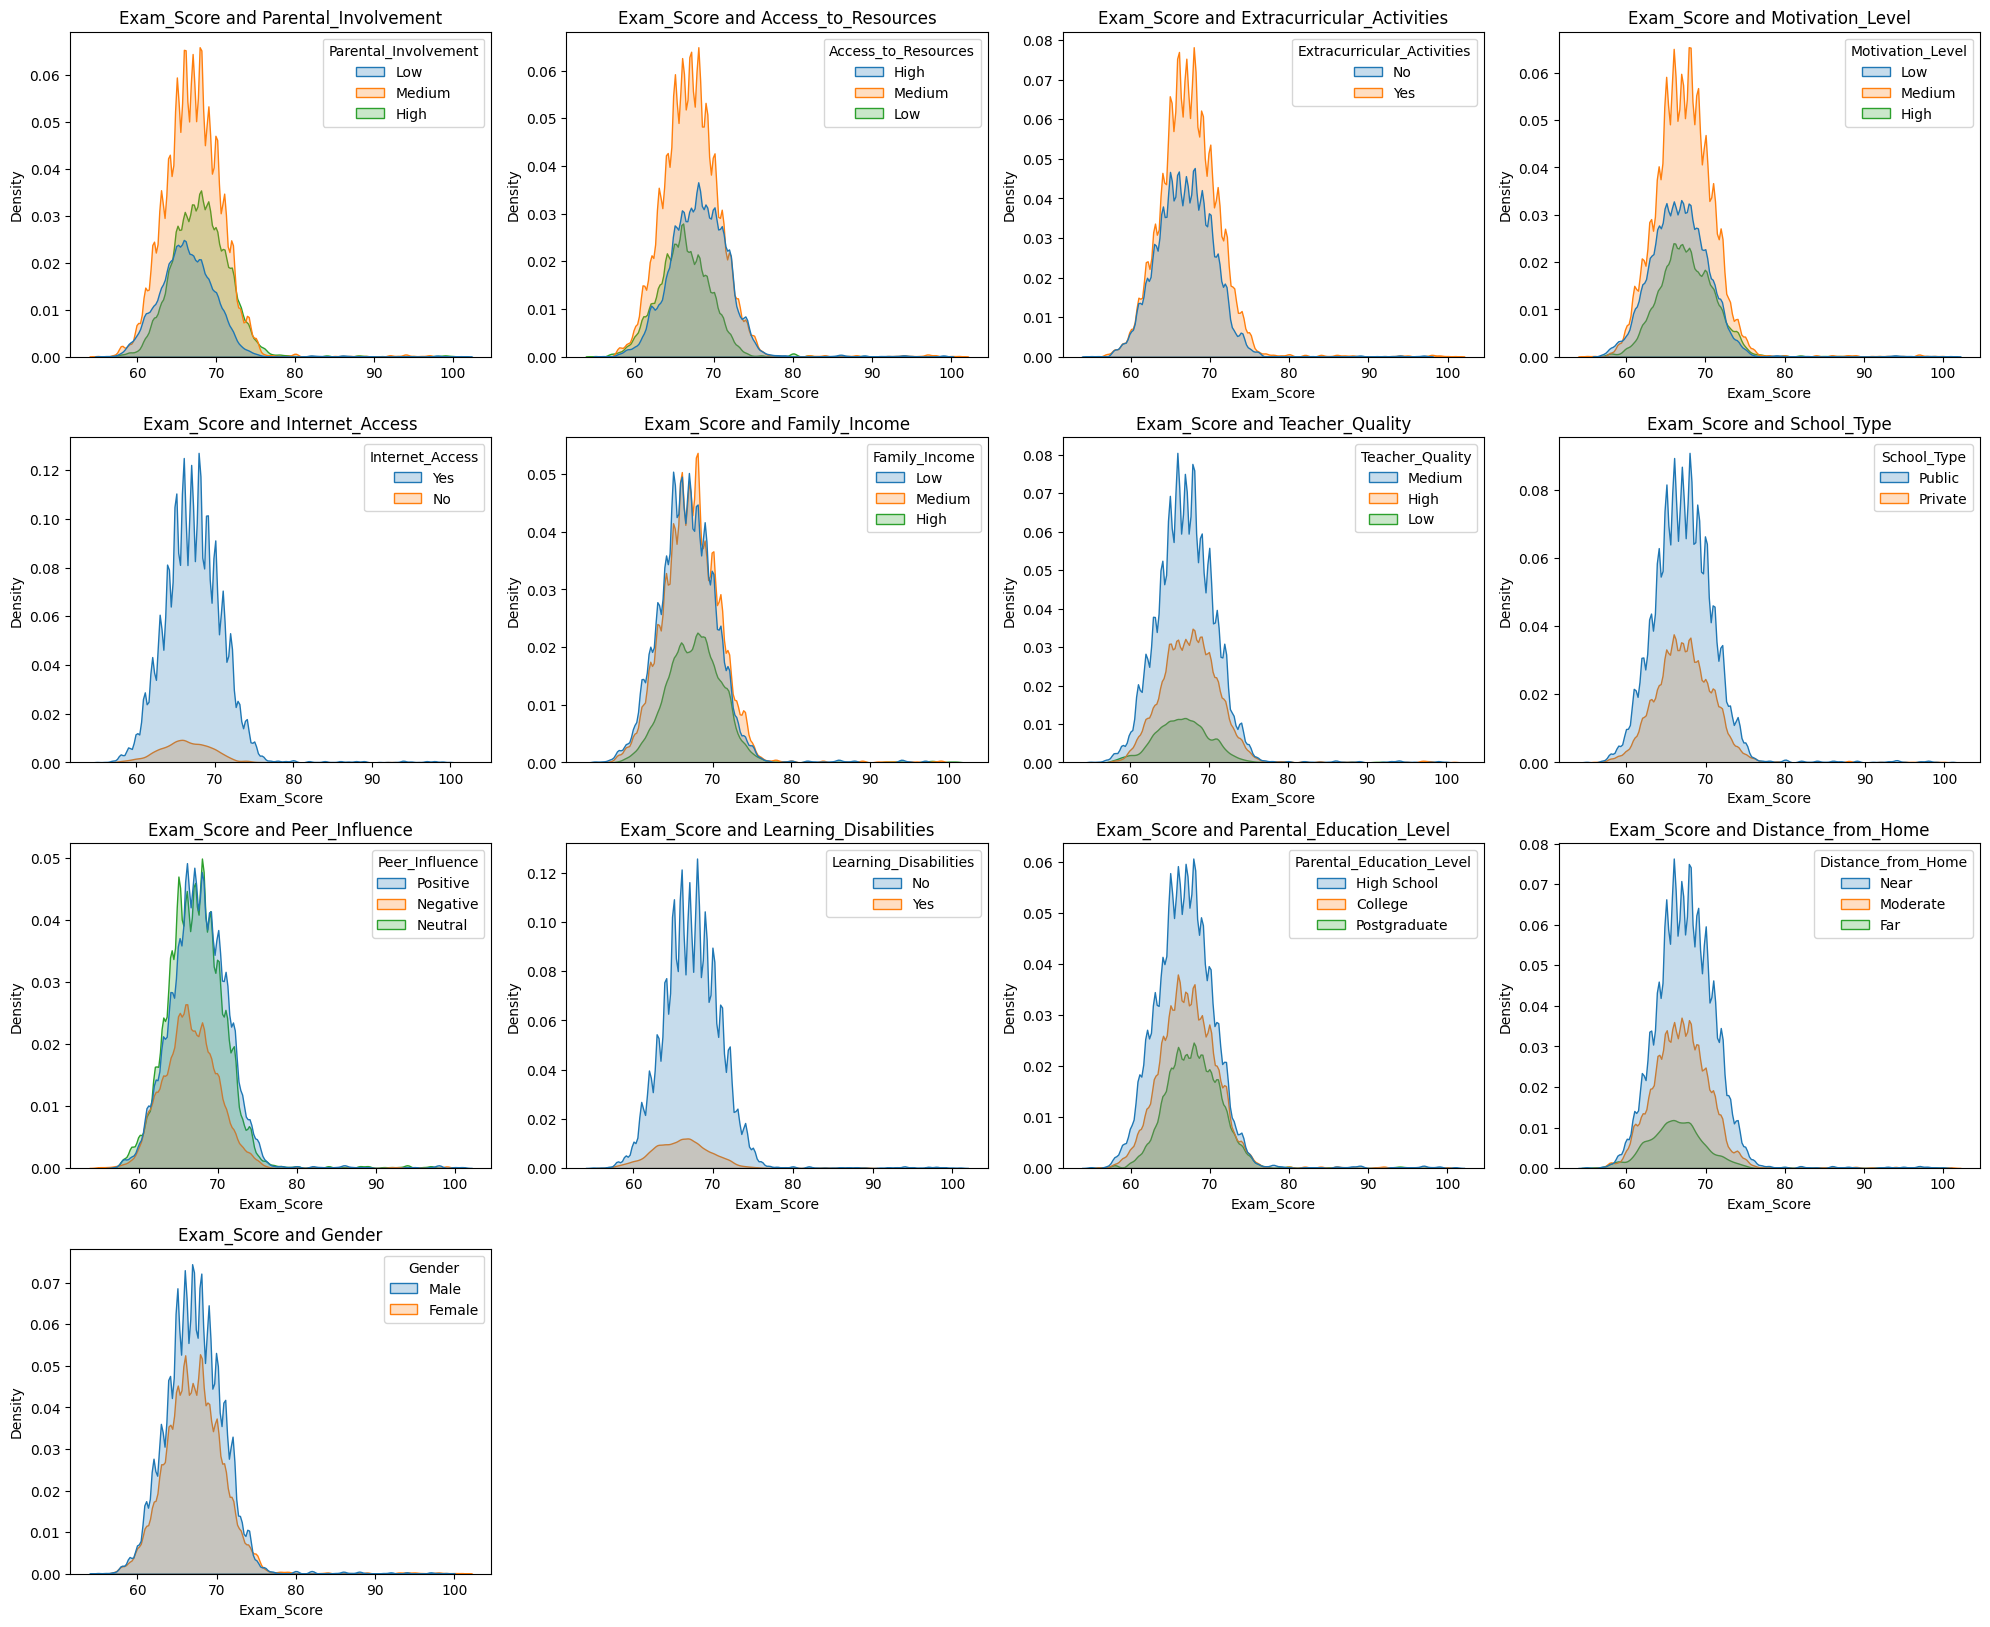

In [225]:
plt.figure(figsize=(20,20))
for i in range(len(categorical_col)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=data['Exam_Score'], hue=data[categorical_col[i]], shade=True, bw_adjust=.5)
    plt.title(f'Exam_Score and {categorical_col[i]}')
    plt.tight_layout()  # Ensure plots don't overlap
plt.show()

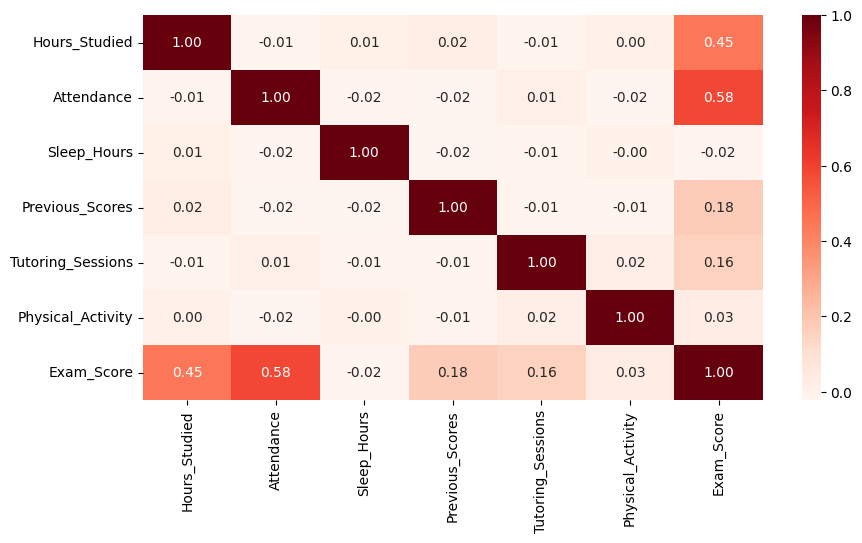

In [226]:
plt.figure(figsize=(10, 5))
sns.heatmap(data[numerical_col].corr(), annot=True, fmt='.2f', cmap='Reds')
plt.show()

# **Missing values**

In [161]:
for col in categorical_col:
    data[col].fillna(data[col].mode()[0],inplace=True)

# **Data transformation**

In [176]:
dummy=pd.get_dummies(data[categorical_col],drop_first=True)
dummy.shape

(6607, 21)

In [179]:
data.drop(columns=categorical_col,inplace=True)
data=pd.concat([data,dummy],axis=1)

In [180]:
data.shape

(6607, 28)

# **Splitting the data**

In [190]:
x=data.drop('Exam_Score',axis=1)
y=data['Exam_Score']

In [191]:
scalar=MinMaxScaler()
x=scalar.fit_transform(x)

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [193]:
print(x_train.shape)
print(x_test.shape)

(5615, 27)
(992, 27)


# **Modeling**

# *LinearRegression*

In [228]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(x_train,y_train))
print("test_score: ",lr.score(x_test,y_test))

mean_squared_error:  2.9163656084529035
train_score:  0.715236354583372
test_score:  0.7968889268307519


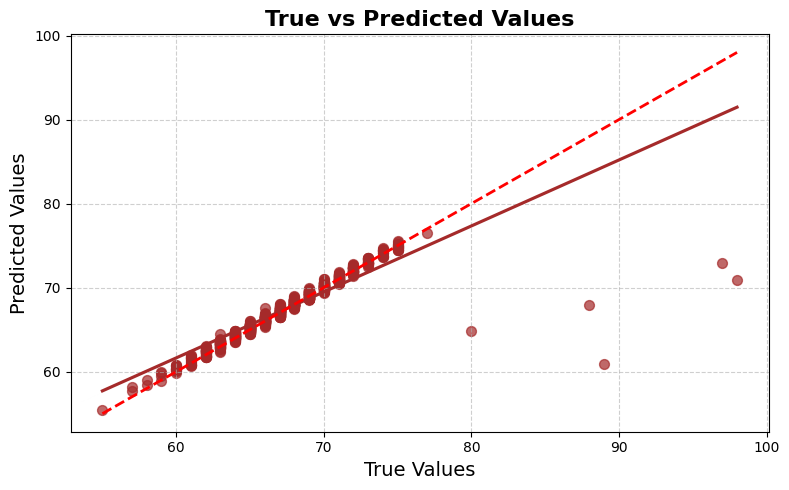

In [233]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# *RandomForest*

In [234]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

mean_squared_error:  4.776675000000001
train_score:  0.9420450190023779
test_score:  0.6673271750912619


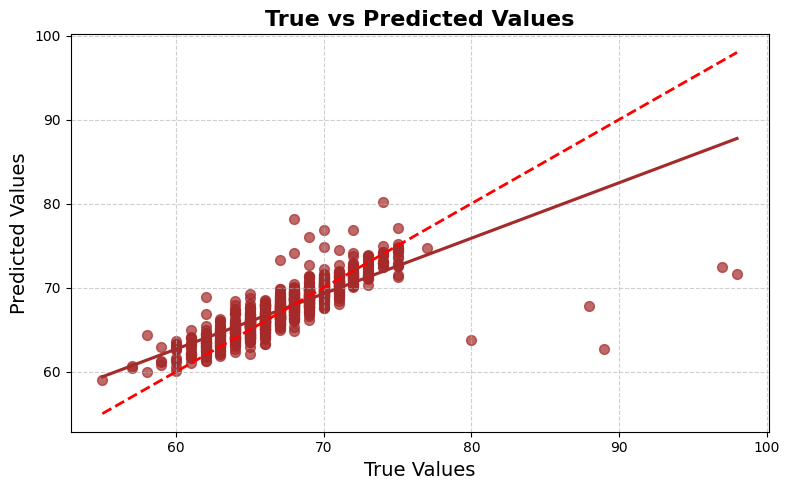

In [235]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# *XGB*

In [236]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",xgb.score(x_train,y_train))
print("test_score: ",xgb.score(x_test,y_test))

mean_squared_error:  4.5443944720870695
train_score:  0.9685769554694146
test_score:  0.6835044154084464


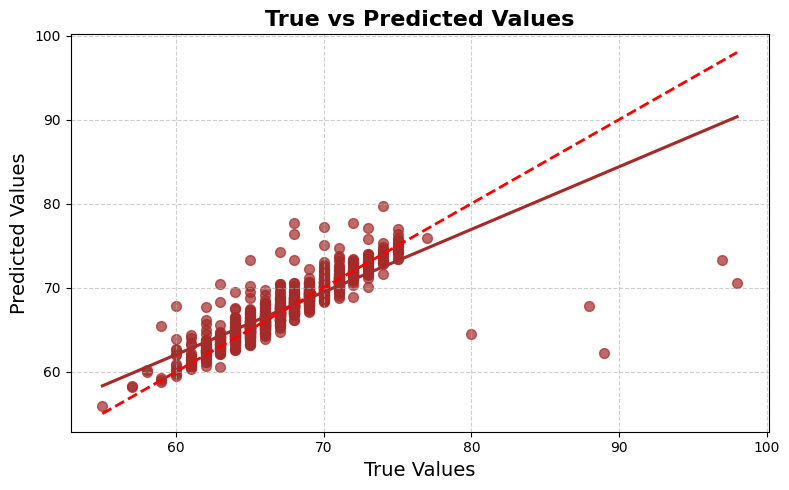

In [237]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# *Ridge*

In [239]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

print("mean_squared_error (Ridge): ", mean_squared_error(y_test, y_pred_ridge))
print("train_score (Ridge): ", ridge.score(x_train, y_train))
print("validation_score (Ridge): ", ridge.score(x_test, y_test))


mean_squared_error (Ridge):  2.91927866925319
train_score (Ridge):  0.7152156306314832
validation_score (Ridge):  0.796686045921843


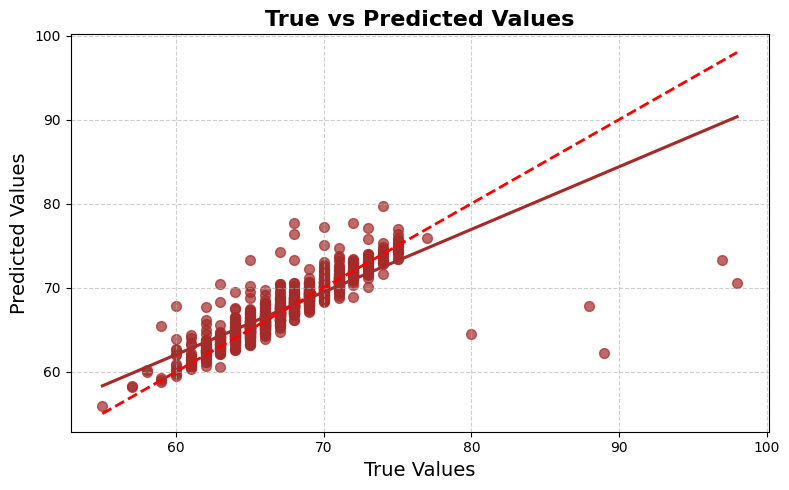

In [240]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# *SVR*

In [241]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",svr.score(x_train,y_train))
print("test_score: ",svr.score(x_test,y_test))

mean_squared_error:  2.9584881467111788
train_score:  0.7146434567011
test_score:  0.7939552912380631


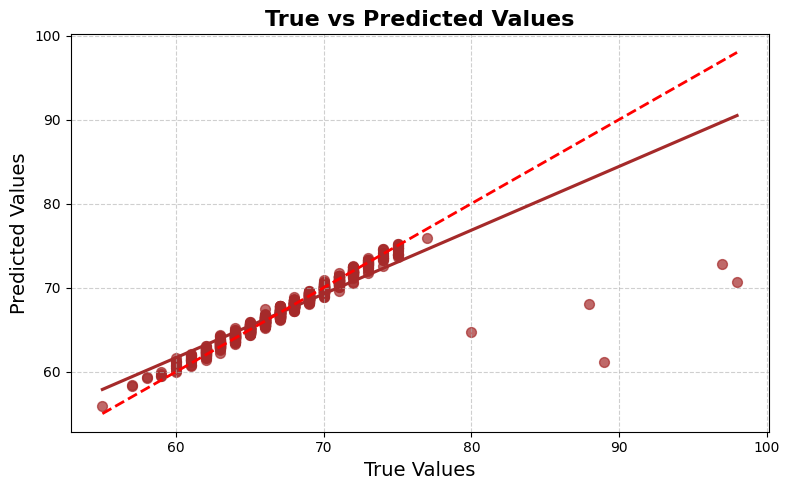

In [242]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# **Models comparison**

In [203]:
acc=[]
names=['LinearRegression','RandomForest','XGB','Ridge','SVR']
acc.extend([lr.score(x_test,y_test),rf.score(x_test,y_test),xgb.score(x_test,y_test),ridge.score(x_test,y_test),svr.score(x_test,y_test)])
acc

[0.7968889268307519,
 0.6752463759779075,
 0.6835044154084464,
 0.796686045921843,
 0.7939552912380631]

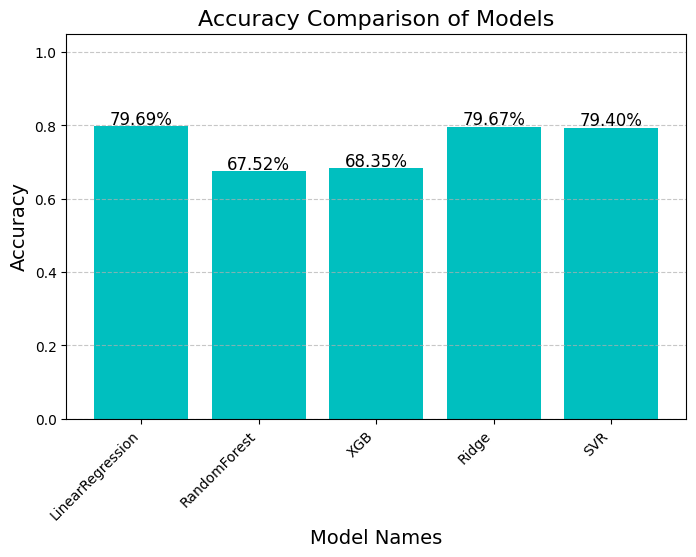

In [208]:
plt.figure(figsize=(8,5))

plt.bar(names, acc, color='c')
plt.title('Accuracy Comparison of Models', fontsize=16)
plt.xlabel('Model Names', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(acc):
    plt.text(i, value + 0.005 , f'{value*100:.2f}%', ha='center', fontsize=12, color='black')

plt.ylim(0, 1.05)

plt.xticks(rotation=45, ha='right')
plt.show()